In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\mukes\Downloads\StudentsPerformance.csv")

In [2]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:

en_coding = pd.get_dummies(df,columns=["gender","test preparation course","lunch"],drop_first=True)


In [4]:
en_coding = en_coding.replace({True: 1, False: 0})


C:\Users\mukes\AppData\Local\Temp\ipykernel_15172\3213635602.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  en_coding = en_coding.replace({True: 1, False: 0})


In [6]:
en_coding

,race/ethnicity,parental level of education,math score,reading score,writing score,gender_male,test preparation course_none,lunch_standard
0,group B,bachelor's degree,72,72,74,0,1,1
1,group C,some college,69,90,88,0,0,1
2,group B,master's degree,90,95,93,0,1,1
3,group A,associate's degree,47,57,44,1,1,0
4,group C,some college,76,78,75,1,1,1
...,...,...,...,...,...,...,...,...
995,group E,master's degree,88,99,95,0,0,1
996,group C,high school,62,55,55,1,1,0
997,group C,high school,59,71,65,0,0,0
998,group D,some college,68,78,77,0,0,1


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
c =["race/ethnicity","parental level of education"]
for i in c:
    en_coding[i]=le.fit_transform(en_coding[i])

In [9]:
en_coding


,race/ethnicity,parental level of education,math score,reading score,writing score,gender_male,test preparation course_none,lunch_standard
0,1,1,72,72,74,0,1,1
1,2,4,69,90,88,0,0,1
2,1,3,90,95,93,0,1,1
3,0,0,47,57,44,1,1,0
4,2,4,76,78,75,1,1,1
...,...,...,...,...,...,...,...,...
995,4,3,88,99,95,0,0,1
996,2,2,62,55,55,1,1,0
997,2,2,59,71,65,0,0,0
998,3,4,68,78,77,0,0,1


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [11]:
sc1 =["math score","writing score"]
for i in sc1:
    en_coding[i] = sc.fit_transform(df[[i]])

In [12]:
en_coding

,race/ethnicity,parental level of education,math score,reading score,writing score,gender_male,test preparation course_none,lunch_standard
0,1,1,0.390024,72,0.391492,0,1,1
1,2,4,0.192076,90,1.313269,0,0,1
2,1,3,1.577711,95,1.642475,0,1,1
3,0,0,-1.259543,57,-1.583744,1,1,0
4,2,4,0.653954,78,0.457333,1,1,1
...,...,...,...,...,...,...,...,...
995,4,3,1.445746,99,1.774157,0,0,1
996,2,2,-0.269803,55,-0.859491,1,1,0
997,2,2,-0.467751,71,-0.201079,0,0,0
998,3,4,0.126093,78,0.589015,0,0,1


In [13]:
from sklearn.model_selection import train_test_split

X = en_coding.drop("reading score", axis=1)   
y = en_coding["reading score"]                

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
lr.score(X_train,y_train)

0.9250091057249687

In [17]:
lr.score(X_test,y_test)

0.9152517053860338

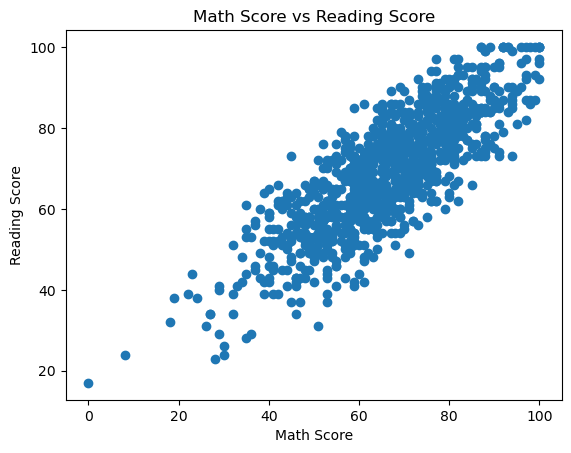

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df["math score"], df["reading score"])
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.title("Math Score vs Reading Score")
plt.show()


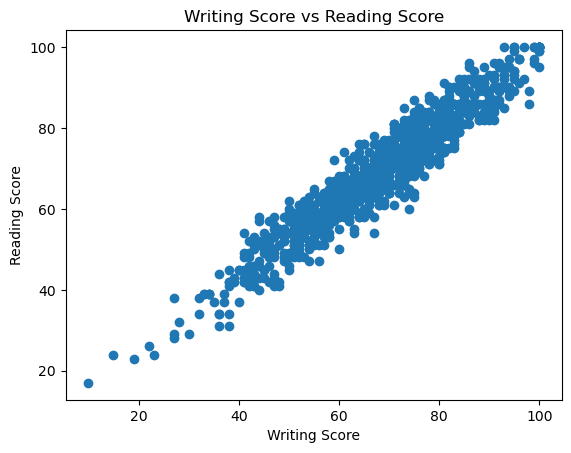

In [19]:
plt.scatter(df["writing score"], df["reading score"])
plt.xlabel("Writing Score")
plt.ylabel("Reading Score")
plt.title("Writing Score vs Reading Score")
plt.show()


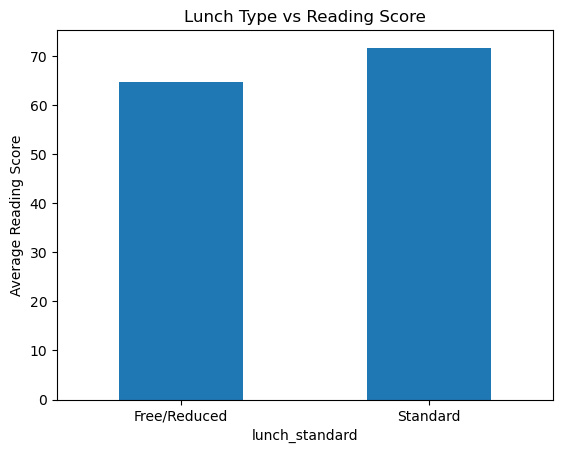

In [20]:
en_coding.groupby("lunch_standard")["reading score"].mean().plot(kind="bar")
plt.xticks([0,1], ["Free/Reduced","Standard"], rotation=0)
plt.ylabel("Average Reading Score")
plt.title("Lunch Type vs Reading Score")
plt.show()


1️⃣ Histogram – Reading Score Distribution

📊 (single numeric column)

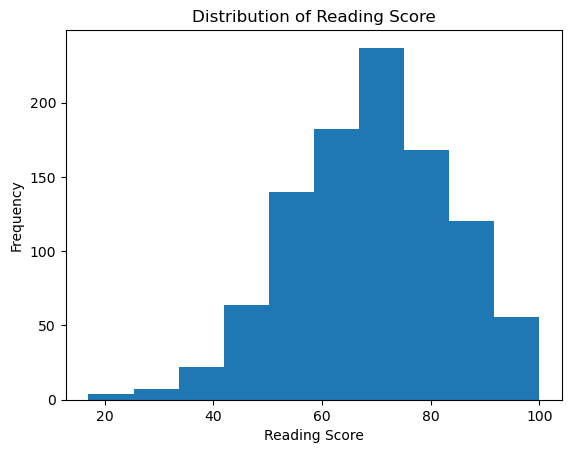

In [21]:
import matplotlib.pyplot as plt

plt.hist(en_coding["reading score"], bins=10)
plt.xlabel("Reading Score")
plt.ylabel("Frequency")
plt.title("Distribution of Reading Score")
plt.show()


🔍 Kya pata chalta hai:

Scores ka spread

Normal / skewed distribution

2️⃣ Scatter – Math vs Reading

📊 (numeric vs numeric)

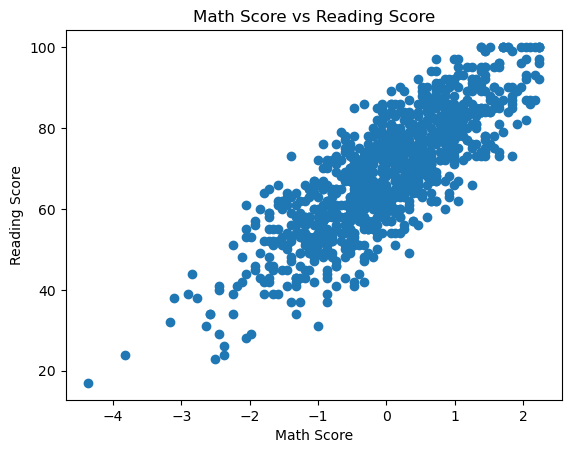

In [22]:
plt.scatter(en_coding["math score"], en_coding["reading score"])
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.title("Math Score vs Reading Score")
plt.show()


🔍 Kya pata chalta hai:

Positive relationship

Regression ke liye useful

3️⃣ Scatter – Writing vs Reading

📊 (numeric vs numeric)

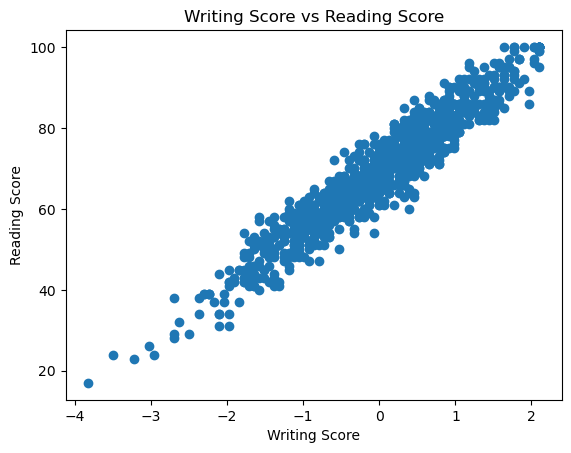

In [23]:
plt.scatter(en_coding["writing score"], en_coding["reading score"])
plt.xlabel("Writing Score")
plt.ylabel("Reading Score")
plt.title("Writing Score vs Reading Score")
plt.show()


🔍 Kya pata chalta hai:

Strong correlation

Best predictor

4️⃣ Bar Graph – Gender vs Reading

📊 (categorical vs numeric)

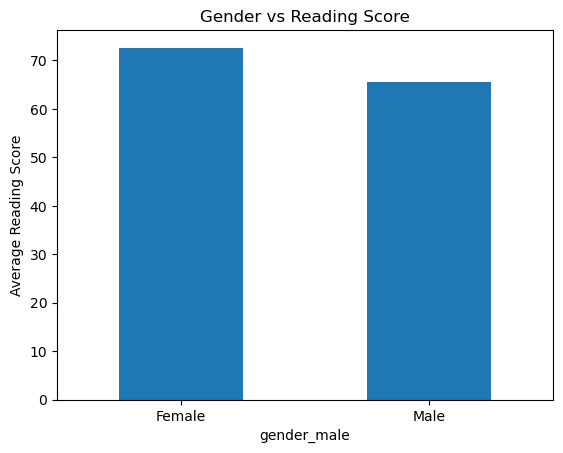

In [24]:
en_coding.groupby("gender_male")["reading score"].mean().plot(kind="bar")
plt.xticks([0,1], ["Female","Male"], rotation=0)
plt.ylabel("Average Reading Score")
plt.title("Gender vs Reading Score")
plt.show()


🔍 Kya pata chalta hai:

Gender ka impact

5️⃣ Bar Graph – Lunch vs Reading

📊 (categorical vs numeric)

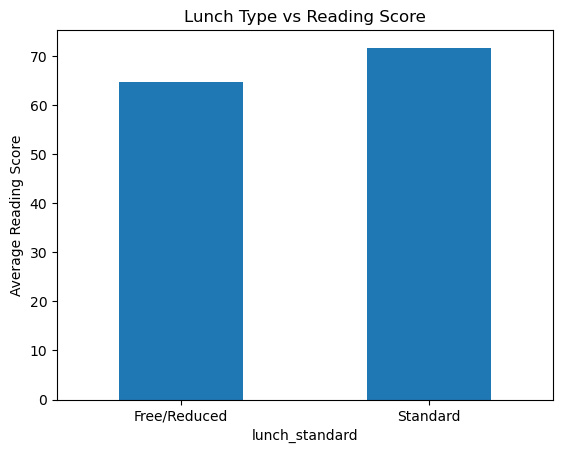

In [25]:
en_coding.groupby("lunch_standard")["reading score"].mean().plot(kind="bar")
plt.xticks([0,1], ["Free/Reduced","Standard"], rotation=0)
plt.ylabel("Average Reading Score")
plt.title("Lunch Type vs Reading Score")
plt.show()


🔍 Kya pata chalta hai:

Socio-economic effect

6️⃣ Bar Graph – Test Preparation vs Reading

📊 (categorical vs numeric)

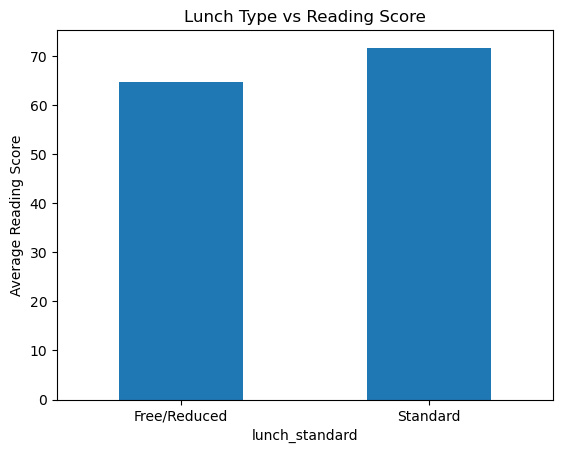

In [26]:
en_coding.groupby("lunch_standard")["reading score"].mean().plot(kind="bar")
plt.xticks([0,1], ["Free/Reduced","Standard"], rotation=0)
plt.ylabel("Average Reading Score")
plt.title("Lunch Type vs Reading Score")
plt.show()


🔍 Kya pata chalta hai:

Socio-economic effect

7️⃣ Correlation Heatmap (Most Powerful 🔥)

📊 (all numeric together)

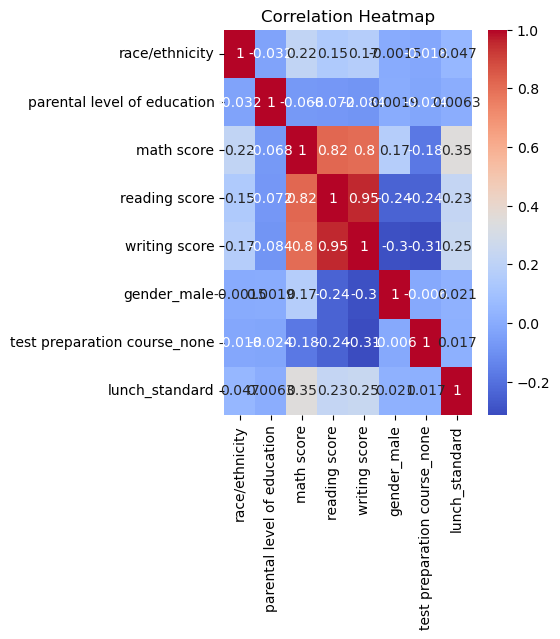

In [27]:
import seaborn as sns

plt.figure(figsize=(4,5))
sns.heatmap(en_coding.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


🔍 Kya pata chalta hai:

Kaun sa feature sabse zyada related hai

Feature selection ke liye best

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
y_pred = lr.predict(X_test)

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)


MAE: 3.5109421869973336
MSE: 19.177214879037187


In [31]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [33]:
import pandas as pd
import numpy as np

gender = input("Enter gender (male/female): ")
race = input("Enter race/ethnicity (group A-E): ")
parent_edu = input("Enter parental level of education (some high school, high school, some college, associate's degree, bachelor's degree, master's degree): ")
lunch = input("Enter lunch (standard/free/reduced): ")
prep = input("Enter test preparation course (completed/none): ")
math = float(input("Enter math score: "))
writing = float(input("Enter writing score: "))


new_data = pd.DataFrame({
    "race/ethnicity": [race],
    "parental level of education": [parent_edu],
    "math score": [math],
    "writing score": [writing],
    "gender_male": [1 if gender=="male" else 0],
    "test preparation course_none": [1 if prep=="none" else 0],
    "lunch_standard": [1 if lunch=="standard" else 0]
})


new_data["race/ethnicity"] = le.fit_transform(new_data["race/ethnicity"])
new_data["parental level of education"] = le.fit_transform(new_data["parental level of education"])


numeric_cols = ["math score","writing score"]
new_data[numeric_cols] = sc.fit_transform(new_data[numeric_cols])

predicted_score = lr.predict(new_data)
print("Predicted Reading Score:", round(predicted_score[0],2))


Enter gender (male/female):  female
Enter race/ethnicity (group A-E):  group B
Enter parental level of education (some high school, high school, some college, associate's degree, bachelor's degree, master's degree):  bachelor's degree
Enter lunch (standard/free/reduced):  standard
Enter test preparation course (completed/none):  none
Enter math score:  72
Enter writing score:  74


Predicted Reading Score: 69.86
